Plot population growth by state

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [83]:
population_data = population_data[(population_data["age"] == "overall") &
                                          (population_data["ethnicity"] == "overall") &
                                          (population_data["sex"] == "both")]
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
48,Johor,1971-01-01,both,overall,overall,1355.4
96,Johor,1972-01-01,both,overall,overall,1385.3
144,Johor,1973-01-01,both,overall,overall,1414.5
192,Johor,1974-01-01,both,overall,overall,1444.4


In [84]:
population_data["year"] = pd.to_datetime(population_data["date"]).dt.year
population_data.head()

,state,date,sex,age,ethnicity,population,year
0,Johor,1970-01-01,both,overall,overall,1325.6,1970
48,Johor,1971-01-01,both,overall,overall,1355.4,1971
96,Johor,1972-01-01,both,overall,overall,1385.3,1972
144,Johor,1973-01-01,both,overall,overall,1414.5,1973
192,Johor,1974-01-01,both,overall,overall,1444.4,1974


Create pivot table to tabulate population before proceeding to growth rate

In [85]:
grouped = population_data.pivot_table("population", index = "state",
                                         columns = ["year"], aggfunc="sum")
grouped

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
state,,,,,,,,,,,,,,,,,,,,,
Johor,1325.6,1355.4,1385.3,1414.5,1444.4,1477.0,1508.4,1541.9,1573.4,1606.4,...,3651.8,3697.0,3749.4,3761.2,4009.7,4020.0,4028.3,4107.2,4184.4,4205.9
Kedah,989.5,1003.9,1017.3,1029.0,1041.1,1054.9,1065.4,1079.8,1090.9,1103.4,...,2119.7,2143.9,2163.0,2173.7,2131.4,2151.7,2163.1,2189.3,2217.1,2228.0
Kelantan,707.3,723.6,741.1,759.5,776.8,796.1,814.1,834.2,852.5,873.7,...,1796.7,1829.0,1860.5,1883.8,1792.5,1812.3,1830.6,1859.8,1887.9,1907.7
Melaka,419.4,424.9,429.9,434.2,438.1,443.1,447.3,452.1,456.2,460.8,...,901.1,913.1,922.4,928.4,998.4,1004.5,1008.6,1028.3,1046.7,1052.5
Negeri Sembilan,500.4,508.2,515.9,522.8,530.0,537.6,544.3,551.8,558.7,566.4,...,1099.3,1114.0,1122.9,1126.2,1200.0,1204.2,1207.9,1224.9,1239.5,1244.6
Pahang,523.8,548.4,574.0,599.3,626.0,653.4,680.4,709.5,738.2,768.4,...,1626.7,1647.0,1664.7,1671.4,1591.3,1601.5,1614.3,1643.2,1667.7,1678.2
Perak,1631.5,1650.9,1669.3,1686.0,1702.7,1720.9,1736.7,1755.6,1771.5,1789.1,...,2482.1,2493.2,2503.5,2508.8,2496.0,2515.8,2514.4,2541.2,2569.4,2574.9
Perlis,125.5,127.4,129.7,131.7,133.8,136.2,138.3,141.0,143.2,145.8,...,251.0,252.0,253.5,254.0,284.9,287.6,289.8,293.1,296.8,297.8
Pulau Pinang,808.6,823.7,838.9,852.9,866.7,881.7,896.4,912.2,925.7,940.4,...,1717.7,1744.1,1762.8,1768.8,1740.4,1740.0,1740.9,1772.6,1800.5,1803.3


Transpose pivot table as pct_change is calculated by row

In [86]:
grouped_prop = grouped.T.pct_change()
grouped_prop

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,0.022480,0.014553,0.023045,0.013114,0.015588,0.046964,0.011891,0.015139,0.018674,0.042974,0.027194,0.043917,0.024355,NaN,NaN,NaN
1972,0.022060,0.013348,0.024185,0.011767,0.015152,0.046681,0.011145,0.018053,0.018453,0.043126,0.027319,0.042803,0.024476,NaN,NaN,NaN
1973,0.021078,0.011501,0.024828,0.010002,0.013375,0.044077,0.010004,0.015420,0.016689,0.043318,0.027232,0.040992,0.026166,NaN,NaN,NaN
1974,0.021138,0.011759,0.022778,0.008982,0.013772,0.044552,0.009905,0.015945,0.016180,0.043539,0.027222,0.039274,0.024390,NaN,NaN,NaN
1975,0.022570,0.013255,0.024846,0.011413,0.014340,0.043770,0.010689,0.017937,0.017307,0.043657,0.027280,0.038741,0.027922,NaN,NaN,NaN
1976,0.021259,0.009954,0.022610,0.009479,0.012463,0.041322,0.009181,0.015419,0.016672,0.040672,0.026387,0.038067,0.025268,NaN,NaN,NaN
1977,0.022209,0.013516,0.024690,0.010731,0.013779,0.042769,0.010883,0.019523,0.017626,0.040864,0.026366,0.038713,0.028753,NaN,NaN,NaN
1978,0.020429,0.010280,0.021937,0.009069,0.012505,0.040451,0.009057,0.015603,0.014799,0.041078,0.026328,0.037181,0.024955,NaN,NaN,NaN


Skipping 1980 for Selangor as the drop is obvious

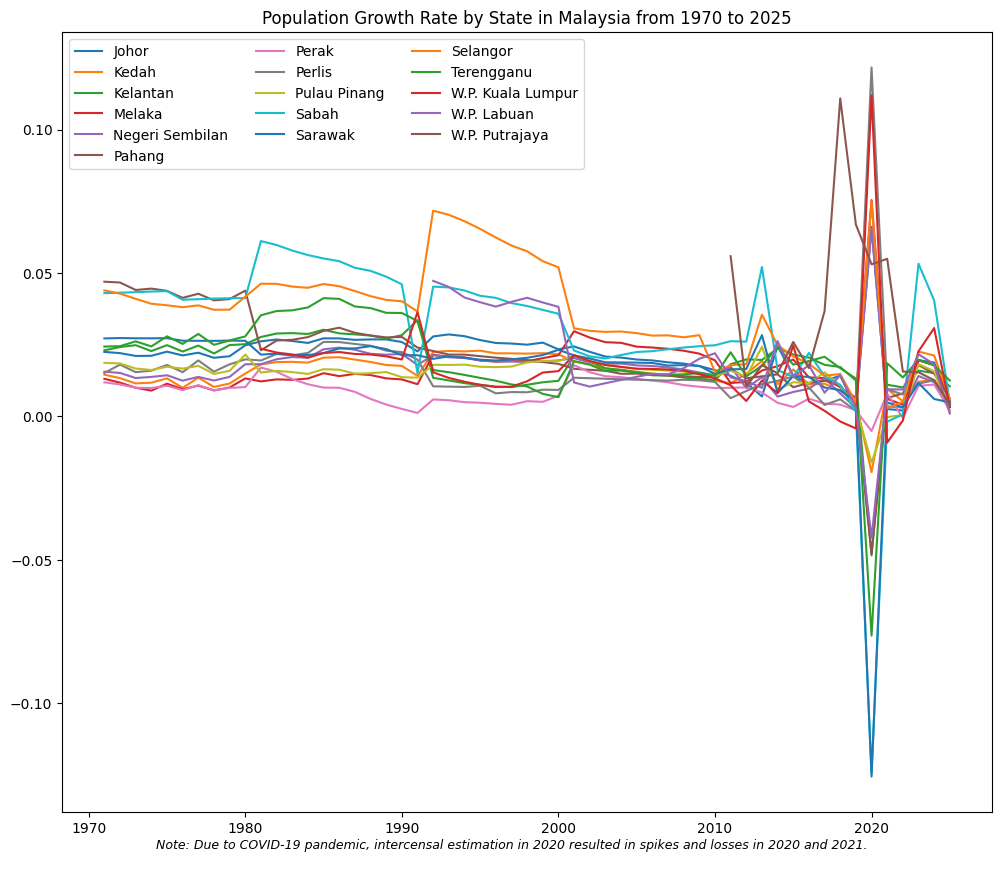

In [118]:
fig, ax = plt.subplots(figsize = (12, 10))

for state in grouped_prop.columns:
    series = grouped_prop[state]

    if state == "Selangor":
        series = series.drop(index = 1980, errors= "ignore")

    ax.plot(series.index, series, label = state)

plt.figtext(
    0.5, 0.05,  
    "Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses in 2020 and 2021.\n",
    wrap=True, ha='center', fontsize=9, style='italic'
)
plt.subplots_adjust(bottom=0.1)

ax.set_title("Population Growth Rate by State in Malaysia from 1970 to 2025")
ax.legend(ncols = 3)
plt.show()

There are huge spikes in 2020, primarily due to COVID-19 pandemic forcing modelling forecast which led to strange gain and loss for some states

To see this, let us view the data from 2019 to 2021

Use loc for indexing row by actual row names

In [88]:
grouped_prop_19_21 = grouped_prop.loc[[2019, 2020, 2021]]
grouped_prop_19_21

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
2019,0.003147,0.004947,0.012524,0.006505,0.002939,0.004025,0.002117,0.001972,0.003404,0.001539,0.005122,0.004803,0.013189,-0.004190,0.003030,0.066872
2020,0.066069,-0.019460,-0.048466,0.075399,0.065530,-0.047924,-0.005102,0.121654,-0.016056,-0.124373,-0.125552,0.075053,-0.076416,0.111978,-0.042296,0.053038
2021,0.002569,0.009524,0.011046,0.006110,0.003500,0.006410,0.007933,0.009477,-0.000230,-0.001814,0.004850,0.002902,0.018531,-0.009132,0.009464,0.054945


In [89]:
grouped_prop_19_21_diff = grouped_prop_19_21.diff()
grouped_prop_19_21_diff

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,0.062922,-0.024407,-0.060989,0.068894,0.062591,-0.051949,-0.007219,0.119681,-0.019460,-0.125912,-0.130675,0.07025,-0.089605,0.116168,-0.045326,-0.013835
2021,-0.063501,0.028984,0.059512,-0.069289,-0.062030,0.054334,0.013035,-0.112177,0.015826,0.122559,0.130402,-0.07215,0.094948,-0.121109,0.051760,0.001907


In [90]:
grouped_prop_19_21_diff_t = grouped_prop_19_21_diff.T
grouped_prop_19_21_diff_t[grouped_prop_19_21_diff_t[2020] > 0]

year,2019,2020,2021
state,,,
Johor,NaN,0.062922,-0.063501
Melaka,NaN,0.068894,-0.069289
Negeri Sembilan,NaN,0.062591,-0.062030
Perlis,NaN,0.119681,-0.112177
Selangor,NaN,0.070250,-0.072150
W.P. Kuala Lumpur,NaN,0.116168,-0.121109


In [91]:
grouped_prop_19_21_diff_t[grouped_prop_19_21_diff_t[2020] < 0]

year,2019,2020,2021
state,,,
Kedah,NaN,-0.024407,0.028984
Kelantan,NaN,-0.060989,0.059512
Pahang,NaN,-0.051949,0.054334
Perak,NaN,-0.007219,0.013035
Pulau Pinang,NaN,-0.019460,0.015826
Sabah,NaN,-0.125912,0.122559
Sarawak,NaN,-0.130675,0.130402
Terengganu,NaN,-0.089605,0.094948
W.P. Labuan,NaN,-0.045326,0.051760


We can see that states that had spike in 2020 followed by a lose in 2021, as expected by correction process and vice versa (This may be familiar to those knowing economic cycle)

Let's combine Selangor, Kuala Lumpur and Putrajaya

In [92]:
data_sel_kl_putra = population_data[population_data["state"].
                                    isin(["Selangor", "W.P. Kuala Lumpur", "W.P. Putrajaya"])]
data_sel_kl_putra

,state,date,sex,age,ethnicity,population,year
191565,Selangor,1970-01-01,both,overall,overall,1696.4,1970
191613,Selangor,1971-01-01,both,overall,overall,1770.9,1971
191661,Selangor,1972-01-01,both,overall,overall,1846.7,1972
191709,Selangor,1973-01-01,both,overall,overall,1922.4,1973
191757,Selangor,1974-01-01,both,overall,overall,1997.9,1974
...,...,...,...,...,...,...,...
261684,W.P. Putrajaya,2021-01-01,both,overall,overall,115.2,2021
262083,W.P. Putrajaya,2022-01-01,both,overall,overall,117.0,2022
262482,W.P. Putrajaya,2023-01-01,both,overall,overall,118.8,2023
262881,W.P. Putrajaya,2024-01-01,both,overall,overall,120.3,2024


In [93]:
grouped = data_sel_kl_putra.pivot_table("population", index = "state", columns = ["year"])
grouped

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
state,,,,,,,,,,,,,,,,,,,,,
Selangor,1696.4,1770.9,1846.7,1922.4,1997.9,2075.3,2154.3,2237.7,2320.9,2407.3,...,6291.5,6380.7,6475.0,6506.1,6994.4,7014.7,7050.3,7209.7,7362.7,7406.8
W.P. Kuala Lumpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1789.7,1793.2,1790.0,1782.5,1982.1,1964.0,1961.2,2005.7,2067.5,2074.1
W.P. Putrajaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.4,87.5,97.2,103.7,109.2,115.2,117.0,118.8,120.3,120.8


In [94]:
grouped = grouped.fillna(0)
grouped = grouped.T
grouped

state,Selangor,W.P. Kuala Lumpur,W.P. Putrajaya
year,,,
1970,1696.4,0.0,0.0
1971,1770.9,0.0,0.0
1972,1846.7,0.0,0.0
1973,1922.4,0.0,0.0
1974,1997.9,0.0,0.0
1975,2075.3,0.0,0.0
1976,2154.3,0.0,0.0
1977,2237.7,0.0,0.0
1978,2320.9,0.0,0.0


In [95]:
grouped_sel_kl_putra = grouped.sum(axis = 1)
grouped_sel_kl_putra

year
1970    1696.4
1971    1770.9
1972    1846.7
1973    1922.4
1974    1997.9
1975    2075.3
1976    2154.3
1977    2237.7
1978    2320.9
1979    2407.3
1980    2507.0
1981    2600.7
1982    2696.8
1983    2794.5
1984    2894.2
1985    3002.0
1986    3113.1
1987    3224.6
1988    3336.5
1989    3449.0
1990    3563.2
1991    3693.3
1992    3887.1
1993    4087.4
1994    4292.9
1995    4502.1
1996    4713.6
1997    4928.3
1998    5150.5
1999    5375.9
2000    5604.9
2001    5763.7
2002    5920.4
2003    6077.8
2004    6239.2
2005    6401.4
2006    6563.7
2007    6730.4
2008    6897.4
2009    7070.6
2010    7250.3
2011    7370.8
2012    7482.8
2013    7707.8
2014    7869.6
2015    8041.4
2016    8165.6
2017    8261.4
2018    8362.2
2019    8392.3
2020    9085.7
2021    9093.9
2022    9128.5
2023    9334.2
2024    9550.5
2025    9601.7
dtype: float64

In [96]:
grouped_sel_kl_putra_prop = grouped_sel_kl_putra.pct_change()
grouped_sel_kl_putra_prop

year
1970         NaN
1971    0.043917
1972    0.042803
1973    0.040992
1974    0.039274
1975    0.038741
1976    0.038067
1977    0.038713
1978    0.037181
1979    0.037227
1980    0.041416
1981    0.037375
1982    0.036952
1983    0.036228
1984    0.035677
1985    0.037247
1986    0.037009
1987    0.035816
1988    0.034702
1989    0.033718
1990    0.033111
1991    0.036512
1992    0.052473
1993    0.051529
1994    0.050276
1995    0.048732
1996    0.046978
1997    0.045549
1998    0.045087
1999    0.043763
2000    0.042598
2001    0.028332
2002    0.027187
2003    0.026586
2004    0.026556
2005    0.025997
2006    0.025354
2007    0.025397
2008    0.024813
2009    0.025111
2010    0.025415
2011    0.016620
2012    0.015195
2013    0.030069
2014    0.020992
2015    0.021831
2016    0.015445
2017    0.011732
2018    0.012201
2019    0.003600
2020    0.082623
2021    0.000903
2022    0.003805
2023    0.022534
2024    0.023173
2025    0.005361
dtype: float64

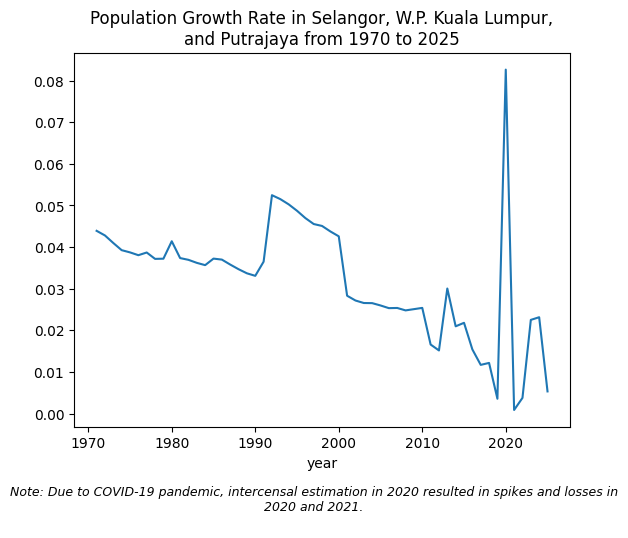

In [122]:
ax = grouped_sel_kl_putra_prop.plot(title= "Population Growth Rate in Selangor, W.P. Kuala Lumpur,\n" + 
                               "and Putrajaya from 1970 to 2025")
plt.figtext(
    0.5, -0.1,  
    "Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses in 2020 and 2021.\n",
    wrap=True, ha='center', fontsize=9, style='italic'
)
plt.subplots_adjust(bottom=0.1)

Let us skip 2020 and 2021

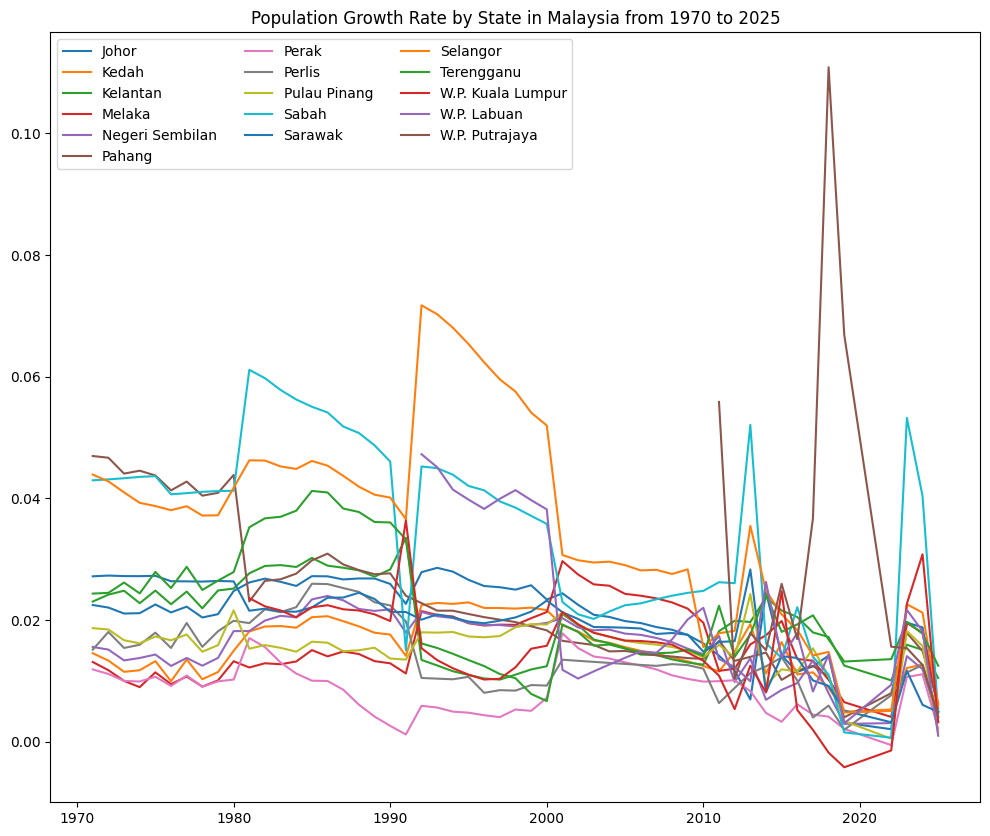

In [98]:
fig, ax = plt.subplots(figsize = (12, 10))

for state in grouped_prop.columns:
    series = grouped_prop[state]
    series = series.drop(index = [2020, 2021], errors = "ignore")

    if state == "Selangor":
        series = series.drop(index = 1980, errors= "ignore")

    ax.plot(series.index, series, label = state)

ax.set_title("Population Growth Rate by State in Malaysia from 1970 to 2025")
ax.legend(ncols = 3)
plt.show()

Growth rate of Selangor bounces around

In [103]:
selangor_data = grouped_prop["Selangor"]
selangor_data

year
1970         NaN
1971    0.043917
1972    0.042803
1973    0.040992
1974    0.039274
1975    0.038741
1976    0.038067
1977    0.038713
1978    0.037181
1979    0.037227
1980   -0.366884
1981    0.046257
1982    0.046218
1983    0.045256
1984    0.044845
1985    0.046158
1986    0.045381
1987    0.043712
1988    0.041929
1989    0.040611
1990    0.040135
1991    0.036582
1992    0.071734
1993    0.070272
1994    0.068060
1995    0.065368
1996    0.062366
1997    0.059565
1998    0.057560
1999    0.054110
2000    0.051985
2001    0.030700
2002    0.029832
2003    0.029463
2004    0.029603
2005    0.029027
2006    0.028167
2007    0.028258
2008    0.027579
2009    0.028338
2010    0.015560
2011    0.017848
2012    0.018231
2013    0.035476
2014    0.024828
2015    0.020938
2016    0.018372
2017    0.014178
2018    0.014779
2019    0.004803
2020    0.075053
2021    0.002902
2022    0.005075
2023    0.022609
2024    0.021221
2025    0.005990
Name: Selangor, dtype: float64

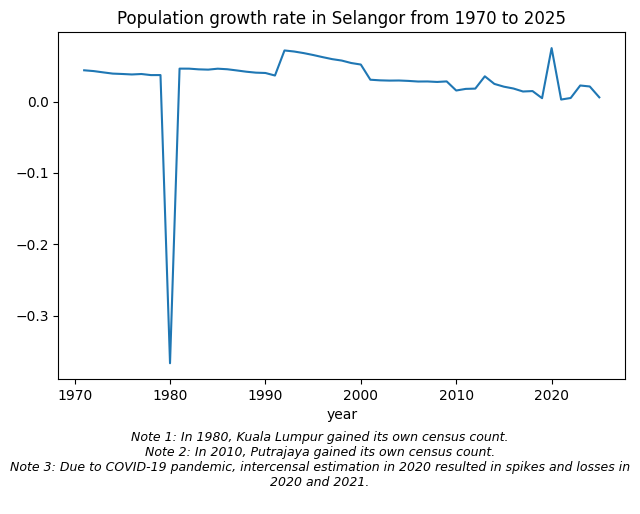

In [119]:
ax = selangor_data.plot(title= "Population growth rate in Selangor from 1970 to 2025")
plt.figtext(
    0.5, -0.05, 
    "Note 1: In 1980, Kuala Lumpur gained its own census count.\n" + "Note 2: In 2010, Putrajaya gained its own census count.\n" + 
    "Note 3: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses in 2020 and 2021.\n",
    wrap=True, ha='center', fontsize=9, style='italic'
)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Extra space for footnote

plt.show()

<Axes: title={'center': 'Population growth rate in Selangor from 1970 to 2025'}, xlabel='year'>

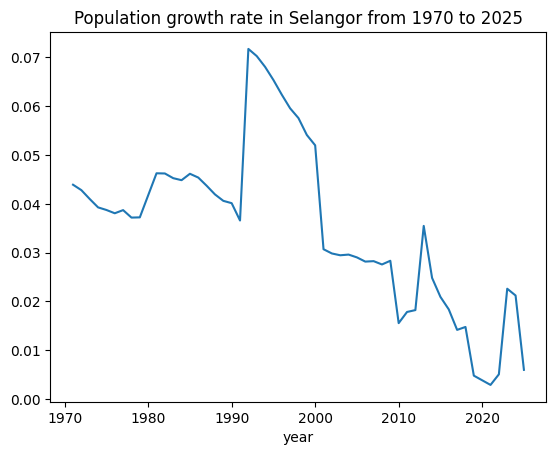

In [125]:
series = selangor_data.drop(index = [1980, 2020], errors= "ignore")
series.plot(title= "Population growth rate in Selangor from 1970 to 2025")

There is a column with growth rate of more than 0.10

Find the row

In [100]:
grouped_prop[grouped_prop.values > 0.1]

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
2018,0.014174,0.008909,0.017223,0.010185,0.007989,0.010747,0.004131,0.005952,0.010722,0.011022,0.009182,0.014779,0.016805,-0.001785,0.014344,0.110857
2020,0.066069,-0.019460,-0.048466,0.075399,0.065530,-0.047924,-0.005102,0.121654,-0.016056,-0.124373,-0.125552,0.075053,-0.076416,0.111978,-0.042296,0.053038
2020,0.066069,-0.019460,-0.048466,0.075399,0.065530,-0.047924,-0.005102,0.121654,-0.016056,-0.124373,-0.125552,0.075053,-0.076416,0.111978,-0.042296,0.053038


The row is Putrajaya in 2018. Let us see the pattern in 2017 and 2019

In [102]:
grouped_prop.loc[[2017, 2018, 2019]]

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
2017,0.012377,0.011417,0.017977,0.013317,0.013372,0.012479,0.004472,0.003984,0.015369,0.013963,0.010078,0.014178,0.020788,0.001956,0.008264,0.036730
2018,0.014174,0.008909,0.017223,0.010185,0.007989,0.010747,0.004131,0.005952,0.010722,0.011022,0.009182,0.014779,0.016805,-0.001785,0.014344,0.110857
2019,0.003147,0.004947,0.012524,0.006505,0.002939,0.004025,0.002117,0.001972,0.003404,0.001539,0.005122,0.004803,0.013189,-0.004190,0.003030,0.066872


Govenrment policy may have induced the migration from other states to Putrajaya, and as Putrajaya's population is quite small, the percentage gain was huge